In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
iris = datasets.load_iris()

In [3]:
data = [[i[0], i[1]] for i in iris['data']]

In [4]:
data = np.array(data)

In [5]:
data = []
a = np.random.random(size=(200, 2))*100+100
data = np.concatenate([np.random.random(size=(200, 2)), a], axis=0)

In [6]:
x = np.linspace(-np.pi, np.pi, num=100)

In [7]:
y = np.sin(x)

In [8]:
data = np.array([[x[i], y[i]] for i in range(100)])

In [9]:
data.shape

(100, 2)

In [10]:
class SOM:
    def __init__(self, data, sizeX=20, sizeY=20, epochs=100):
        self.sizeX = sizeX
        self.sizeY = sizeY
        self.numNodes = sizeX * sizeY
        self.weights = np.random.random(size=(sizeX*sizeY, data.shape[1]))*10
        self.data = data
        self.rad = 10
        self.epochs = epochs
    
    def coords_to_index(self, x, y): 
        return x * self.sizeY + y
    
    def coord(self, x):
        return (int(x / self.sizeX), x % self.sizeY)
    
    def decay_func(self, x0, t, epochs):
        return x0 * np.exp(-2 * x0 * t / self.epochs)
    
    def neighbourhood_func(self, w1, w2, t): 
        return np.exp(-((w1[0] - w2[0])**2 + (w1[1] - w2[1])**2) / (2. * self.decay_func(self.rad, t, self.epochs)**2))
    
    def fit(self, rad=10, lambd=0.1):
        for t in range(self.epochs):
            for d in self.data:
                i = np.argmin(np.sum((d - self.weights)**2, axis=1))
                x, y = self.coord(i)
                r = int(self.decay_func(rad, t, i))
                for x_j in range(max(x - r, 0), min(x + r + 1, self.sizeX)):
                    for y_j in range(max(y - r, 0), min(y + r + 1, self.sizeX)):
                        j = self.coords_to_index(x_j, y_j)
                        self.weights[j] += self.decay_func(lambd, t, self.epochs) * self.neighbourhood_func([x, y], [x_j, y_j], t) * (d - self.weights[j])

In [11]:
som = SOM(data)

In [12]:
som.fit()

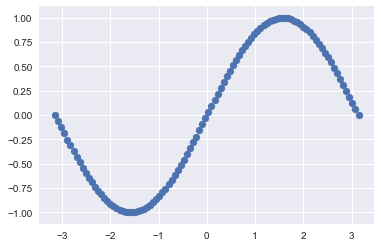

In [13]:
plt.scatter(som.data[:, 0], som.data[:, 1])

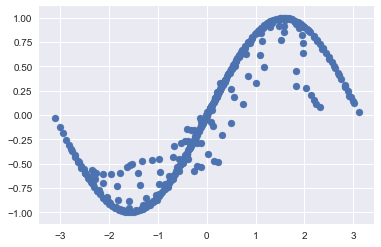

In [14]:
plt.scatter(som.weights[:, 0], [som.weights[:, 1]])